#### Stark Hospital Diabetes Prediction Model

##### Problem Statement

Diabetes poses significant 
healt risks and financial challengess to Star  ospital 
patien.ss. Current methods fr 
early detection at Staospitallinic lack precision, leadi  to 
missed opportunities for  mely 
interveions.
tions.

ons.


This project aims to develop a robust diabetes prediction model to accurately identify individuals at risk of diabetes. As a Data Scientist, I have been approached to lead this project, utilising advanced machine learning techniques on patient data. The goal is to predict the likelihood of diabetes onset, allowing for timely and targeted preventive measures. This initiative will empower Stark Hospital to enhance patient outcomes, reduce the burden on healthcare resources, improve prediction precision and play a proactive role in combating diabetes.

This is a binary classification task to predict whether a patient has diabetes or not.
. Data Understanding - The data provided is in a csv file containing patients' information. Exploratory analysis will be carried out in the notebook below
. Data Preparation - There are no null values in the dataset. However, some variables were misspelt these were corrected
. Modelling - 8 models will be evaluated for this project. Training and test data will be split into 80:20
. Evaluation - Each of the 8 models will be compared and evaluated using different metrics

In [ ]:
# Import Required Libraries

In [1]:
# Data analysis and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [5]:
# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
# Load the data

In [7]:
sh=pd.read_csv(r'C:\Users\Lenovo\Desktop\10Alytics\CapeStone\Final\diabetes_prediction_dataset.csv')
sh.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [9]:
# Data verification - type, features, rows, missing data etc
sh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


###### There are 100,000 entries with no missing data from the dataset info above. However, further analysis must be done to confirm the absence or presence of missing data. The dataset is divided into numerical and categorical data (gender, smoking history).

In [11]:
# Numerical Statistical Analysis
sh.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [13]:
# Categorical Statistical Analysis

sh.describe(include=["object","bool"])

,gender,smoking_history
count,100000,100000
unique,3,5
top,Female,never
freq,58552,39099


In [15]:
# Check for missing values
print(sh.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


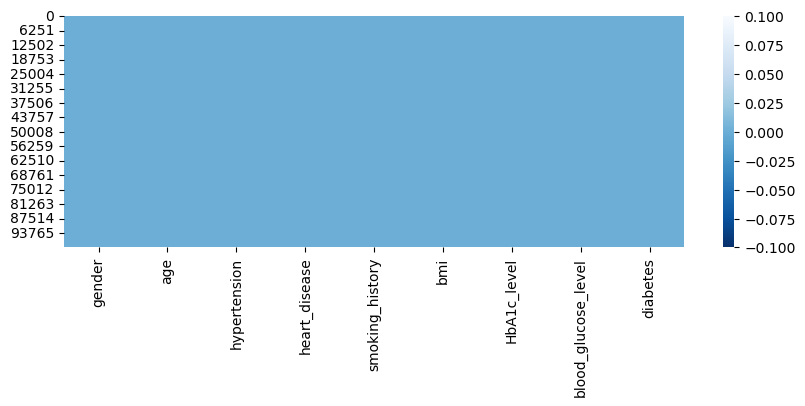

In [17]:
# Visualising missing data
plt.figure(figsize=(10,3))
sns.heatmap(sh.isnull(), cbar=True, cmap="Blues_r");

###### This confirms the absence of missing values/data

In [19]:
# EDA - Categorical Analysis
sh.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
# Create a new function - Age_backet

In [21]:
def age_group(age):
    if age <=19:
        return "Teenager(<=19)"
    if age <=35:
        return "Youth (<=35)"
    elif age <=55:
        return "Adult (<=55)"
    elif age <=65:
        return "Old Adult (<=65)"
    else:
        return "Elderly (>66)"
sh["age_group"]=sh["age"].apply(age_group)

In [ ]:
# Investigating the age group of patients 

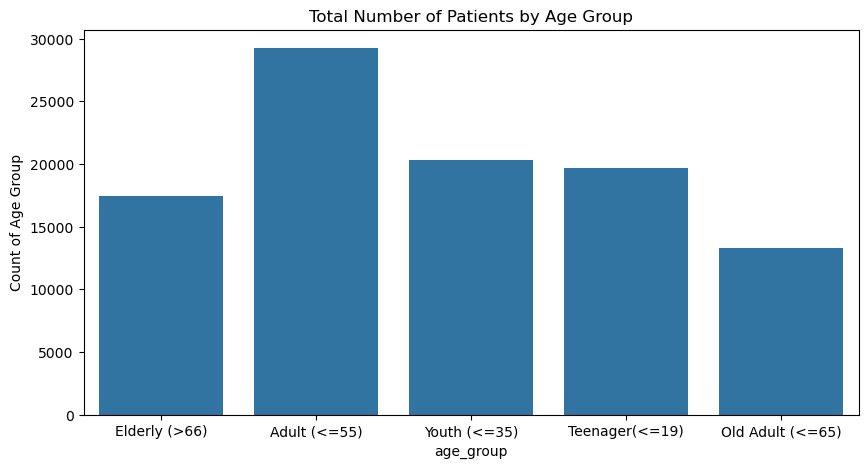

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x="age_group",data=sh)
plt.xlabel("age_group")
plt.ylabel("Count of Age Group")
plt.title("Total Number of Patients by Age Group");

###### Based on the above age group, more patients were within the age bracket 36-55 years. However, youth and teenagers combined were the highest number of patients.   

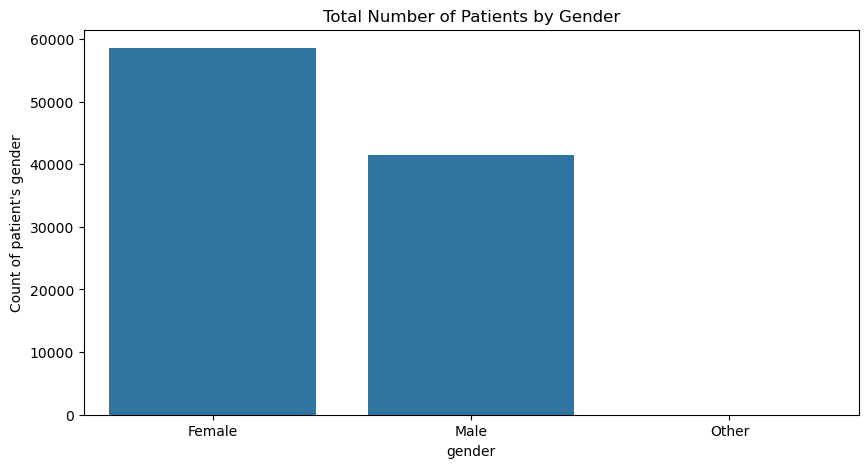

In [25]:
# Investigate patients by gender

plt.figure(figsize=(10,5))
sns.countplot(x="gender",data=sh)
plt.xlabel("gender")
plt.ylabel("Count of patient's gender")
plt.title("Total Number of Patients by Gender");

###### Most of the patients were female. Though some patients' gender was not stated, these were not statistically significant.

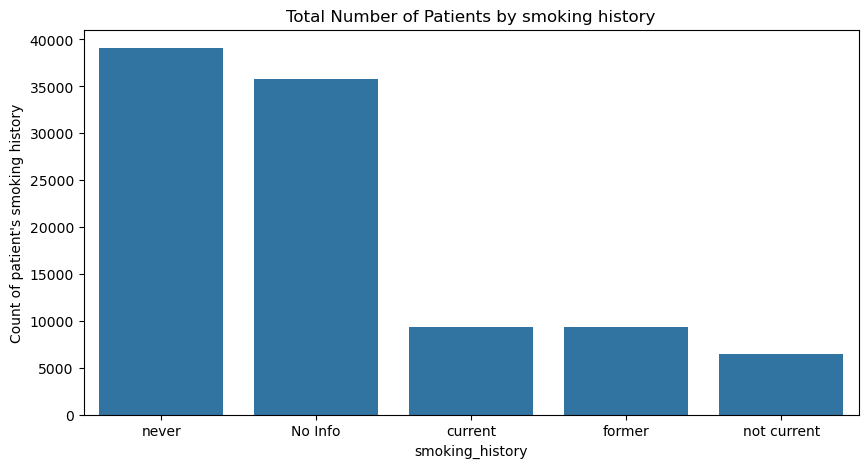

In [27]:
# Investigate patients smoking history

plt.figure(figsize=(10,5))
sns.countplot(x="smoking_history",data=sh)
plt.xlabel("smoking_history")
plt.ylabel("Count of patient's smoking history")
plt.title("Total Number of Patients by smoking history");

###### Most of the patients never smoked. There is no smoking history for a high proportion of patients. There is almost equal proportion of current and former smokers. 

In [29]:
sh["smoking_history"].value_counts()/sh["smoking_history"].value_counts().sum()

smoking_history
never          0.39099
No Info        0.35816
former         0.09352
current        0.09286
not current    0.06447
Name: count, dtype: float64

###### Less than 10% of the patients were current smokers, and though a high number of patients never smoked, there is also a high number of patients with no information on their smoking history.   

In [ ]:
# Create a function - target (diabetes - have disease or not: 1 = yes, 0 = no)

In [31]:
def target(diabetes):
    if diabetes==1:
        return "Yes"
    else:
        return "No"
sh["target"]=sh["diabetes"].apply(target)

# Total patients with diabetes (yes) and those without (no)
print(sh["target"].value_counts())

target
No     91500
Yes     8500
Name: count, dtype: int64


In [ ]:
# Investigating disease target

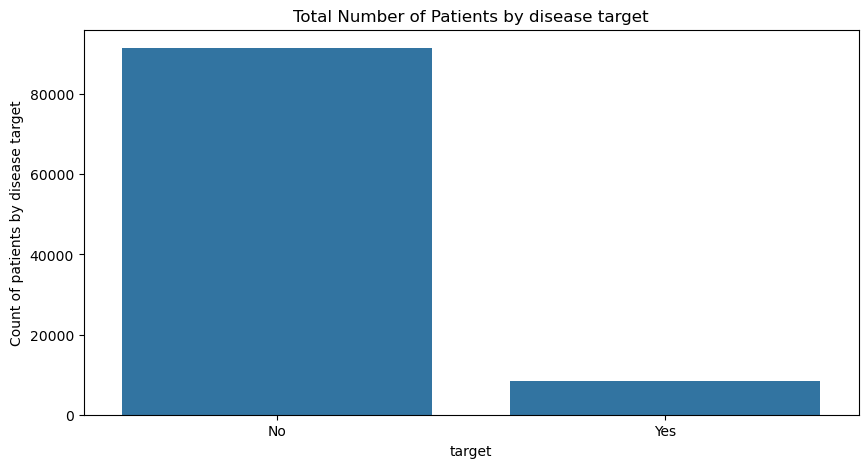

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(x="target",data=sh)
plt.xlabel("target")
plt.ylabel("Count of patients by disease target")
plt.title("Total Number of Patients by disease target");

In [35]:
sh["target"].value_counts()/sh["target"].value_counts().sum()

target
No     0.915
Yes    0.085
Name: count, dtype: float64

###### Only a small proportion (8.5%) of patients have diabetes

In [ ]:
# Univariate Analysis
# Subplot

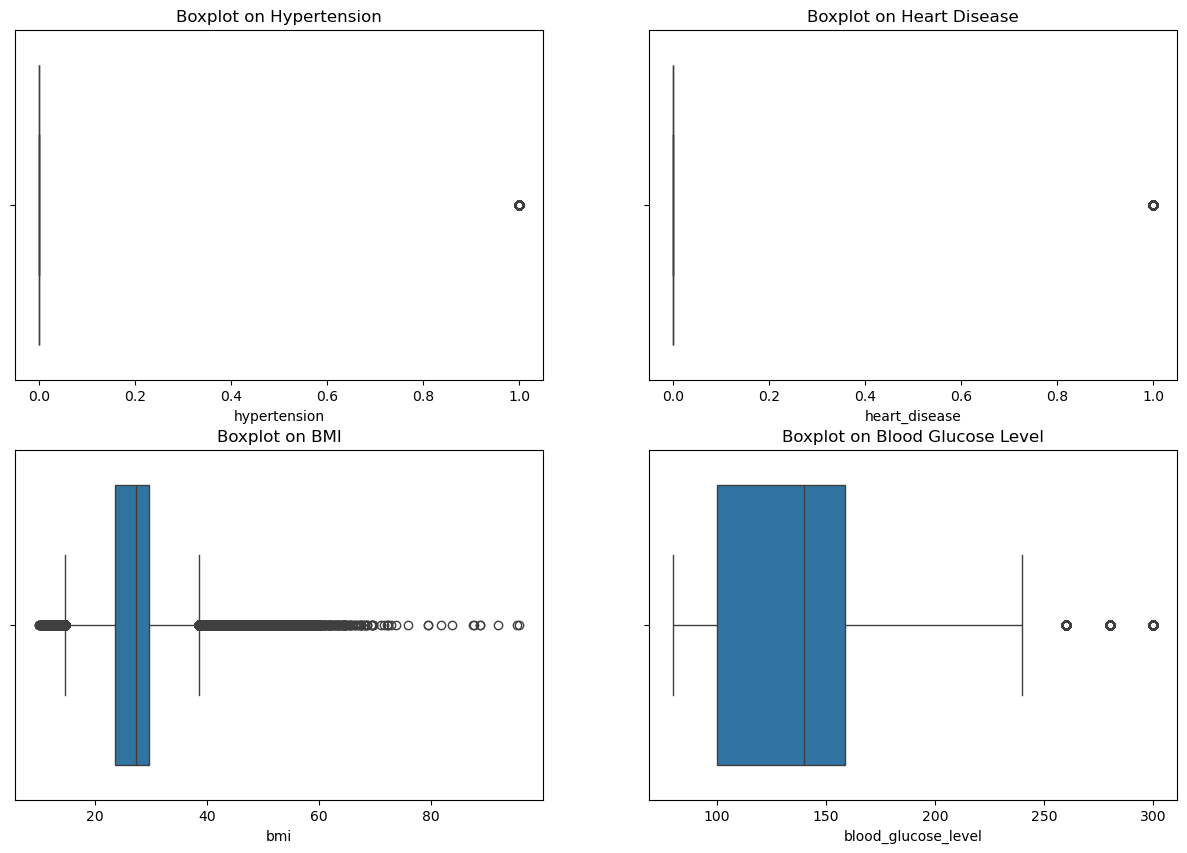

In [37]:
fig,axs=plt.subplots(nrows=2, ncols=2, figsize=(15,10))
sns.boxplot(x="hypertension",data=sh,ax=axs[0,0])
axs[0,0].set_title("Boxplot on Hypertension")

sns.boxplot(x="heart_disease",data=sh,ax=axs[0,1])
axs[0,1].set_title("Boxplot on Heart Disease")

sns.boxplot(x="bmi",data=sh,ax=axs[1,0])
axs[1,0].set_title("Boxplot on BMI")

sns.boxplot(x="blood_glucose_level",data=sh,ax=axs[1,1])
axs[1,1].set_title("Boxplot on Blood Glucose Level");

###### The above boxplots show the spread of data for the various variables. There are outliers across these variables

In [ ]:
# EDA - Bivariate Analysis

In [ ]:
# Investigating the gender and disease target of patients

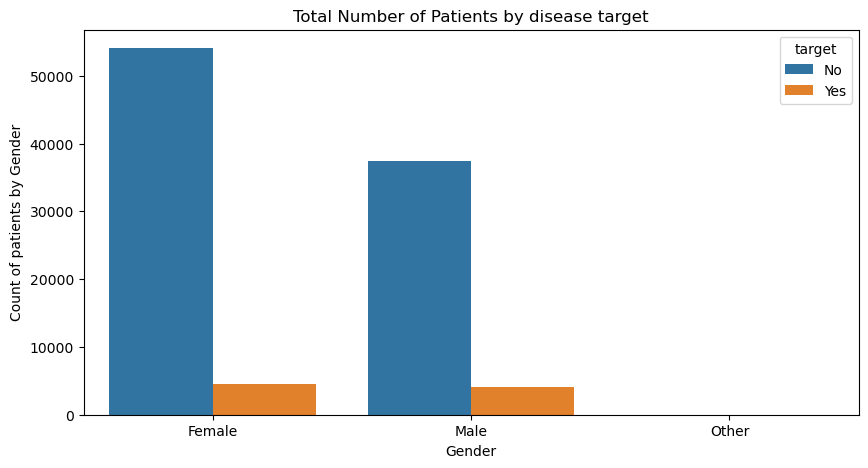

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x="gender",data=sh, hue="target")
plt.xlabel("Gender")
plt.ylabel("Count of patients by Gender")
plt.title("Total Number of Patients by disease target");

In [ ]:
# Investigating patient's age bracket by disease target

In [33]:
sh.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'age_group',
       'target'],
      dtype='object')

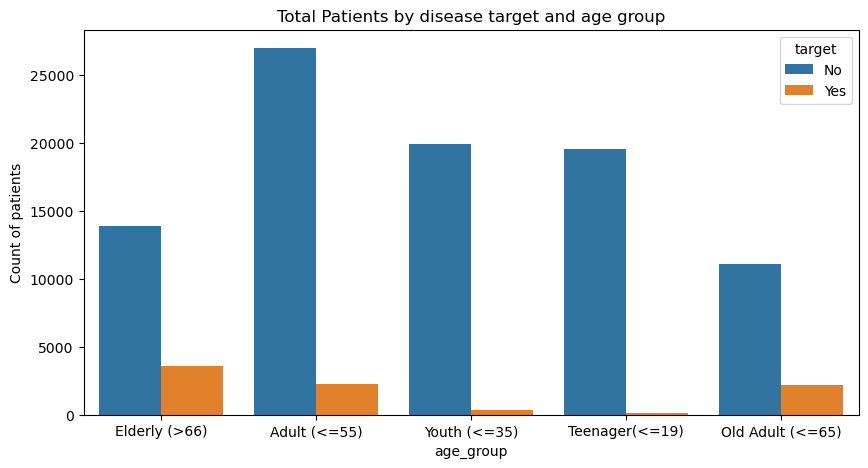

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(x="age_group",data=sh, hue="target")
plt.xlabel("age_group")
plt.ylabel("Count of patients")
plt.title("Total Patients by disease target and age group");

###### Diabetes is more prevalent among the elderly and adults (age 55 and above). However, the disease is prevalent among all age groups of patients at the Stark Hospital

In [ ]:
# Investigating patient's smoking history by disease target

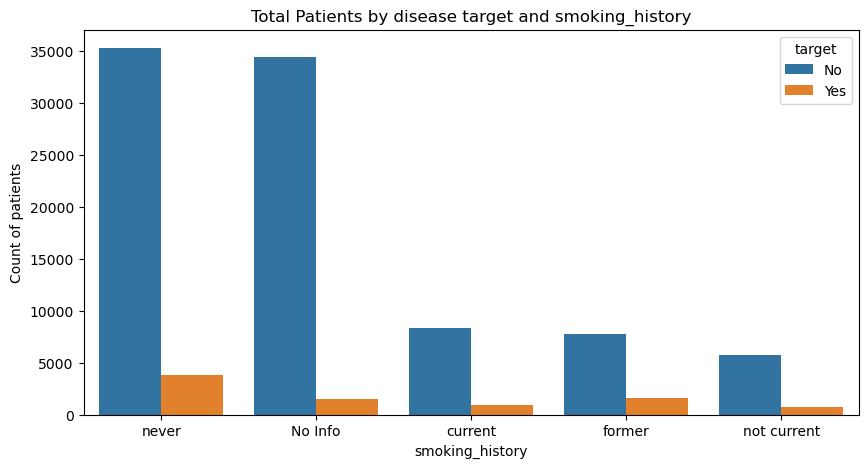

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(x="smoking_history",data=sh, hue="target")
plt.xlabel("smoking_history")
plt.ylabel("Count of patients")
plt.title("Total Patients by disease target and smoking_history");

###### More people with diabetes are found among those who never smoked. However, considering the population size across categories further analysis is required to establish if there is a correlation between smoking and diabetes onset.

In [ ]:
# Multivariate Analysis

In [ ]:
# smoking_history vs HbA1c_level, heart_disease, bmi, blood_glucose_level 

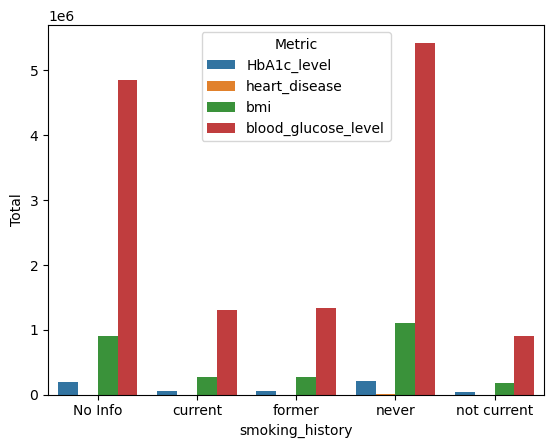

In [9]:
procat=sh.groupby("smoking_history")[["HbA1c_level","heart_disease","bmi","blood_glucose_level"]].sum().reset_index()
procat=pd.melt(procat,id_vars="smoking_history",var_name="Metric",value_name="Total")
sns.barplot(data=procat, x="smoking_history", y="Total", hue="Metric");

In [41]:
numerical_data = sh.select_dtypes(include="number")
numerical_data

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0
99996,2.0,0,0,17.37,6.5,100,0
99997,66.0,0,0,27.83,5.7,155,0
99998,24.0,0,0,35.42,4.0,100,0


In [43]:
numerical_columns = numerical_data.columns
numerical_columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

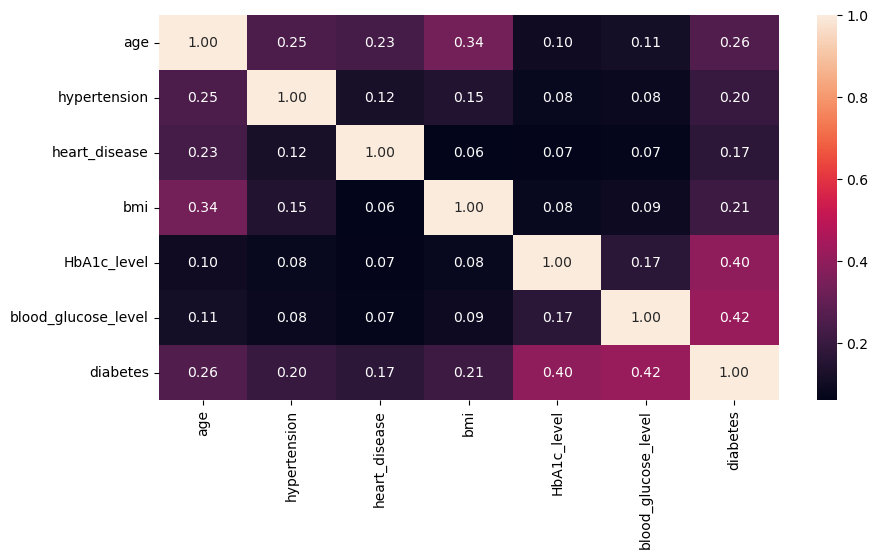

In [45]:
plt.figure(figsize=(10, 5))
sns.heatmap(sh[numerical_columns].corr(), annot=True, fmt=".2f");

###### Correlations exist between the different variables and diabetes but these are weak. For instance, the correlation between age and BMI, diabetes and blood glucose level etc.  

##### Data pre-processing/feature engineering 

In [ ]:
# Create a copy of the data (exclude diabetes/target, alongside other columns that were created) 

In [17]:
sh1 = sh[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level']]

target = sh[["diabetes"]]

In [73]:
sh1.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,80.0,0,1,25.19,6.6,140
1,54.0,0,0,27.32,6.6,80
2,28.0,0,0,27.32,5.7,158
3,36.0,0,0,23.45,5.0,155
4,76.0,1,1,20.14,4.8,155


In [75]:
target.head()

,diabetes
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Dealing with outliers - hypertension', 'heart_disease', HbA1c_level, 'blood_glucose_level, bmi 

In [ ]:
# Normalise the data

In [21]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
scaler = MinMaxScaler()

sh1["Scaled_Hypertension"]=scaler.fit_transform(sh1[["hypertension"]].values.reshape(-1,1))
sh1["Scaled_Heart_disease"]=scaler.fit_transform(sh1[["heart_disease"]].values.reshape(-1,1))
sh1["Scaled_HbA1c_Level"]=scaler.fit_transform(sh1[["HbA1c_level"]].values.reshape(-1,1))
sh1["Scaled_Blood_glucose_level"]=scaler.fit_transform(sh1[["blood_glucose_level"]].values.reshape(-1,1))
sh1["Scaled_BMI"]=scaler.fit_transform(sh1[["bmi"]].values.reshape(-1,1))

sh1.drop(["hypertension", "heart_disease", "HbA1c_level", "blood_glucose_level", "bmi"], axis=1, inplace=True)

##### Machine Learning

In [ ]:
# Split the dataset into training and testing sets - x = questions, y = answers

In [27]:
x_train, x_test, y_train, y_test = train_test_split(sh1, target, test_size=0.2, random_state=42)

In [81]:
# Model Building

# Logistic Regression 

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
ly_pred = logreg.predict(x_test)

In [83]:
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.95845
Precision: 0.8783433994823123
Recall: 0.5960187353629977
F1-score: 0.7101499825601674
AUC-ROC: 0.7941552237934602


In [85]:
x_test

,age,Scaled_Hypertension,Scaled_Heart_disease,Scaled_HbA1c_Level,Scaled_Blood_glucose_level,Scaled_BMI
75721,13.0,0.0,0.0,0.418182,0.209091,0.126167
80184,3.0,0.0,0.0,0.272727,0.295455,0.128268
19864,63.0,0.0,0.0,0.000000,0.545455,0.178688
76699,2.0,0.0,0.0,0.472727,0.209091,0.086601
92991,33.0,0.0,0.0,0.490909,0.545455,0.350957
...,...,...,...,...,...,...
32595,44.0,0.0,0.0,0.454545,0.359091,0.139356
29313,61.0,1.0,0.0,0.000000,0.045455,0.373133
37862,49.0,0.0,0.0,0.236364,0.090909,0.192577
53421,73.0,0.0,1.0,0.563636,0.090909,0.202031


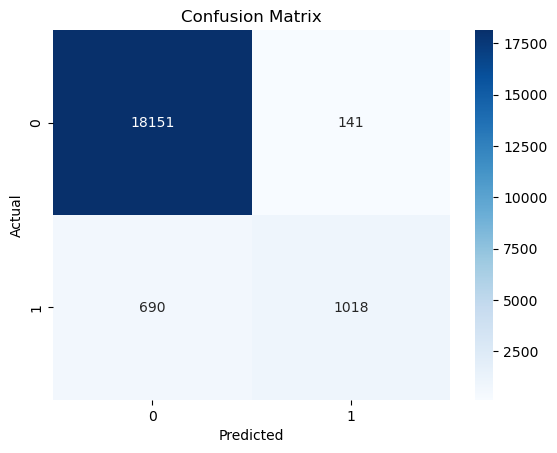

In [87]:
# Create a confusion Matrix
lcm = confusion_matrix(y_test, ly_pred)

# Visualise the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

###### From the above confusion matrix, 1018 were true positive predictions and 18151 were true negative predictions. 690 and 141 were false negative and false positive predictions respectively.

In [89]:
# model Building
# Random Forest Classifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfy_pred = rfc.predict(x_test)
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))

Logistic Regression
Accuracy: 0.9688
Precision: 0.9137404580152672
Recall: 0.7008196721311475
F1-score: 0.7932405566600398
AUC-ROC: 0.8473210540843797


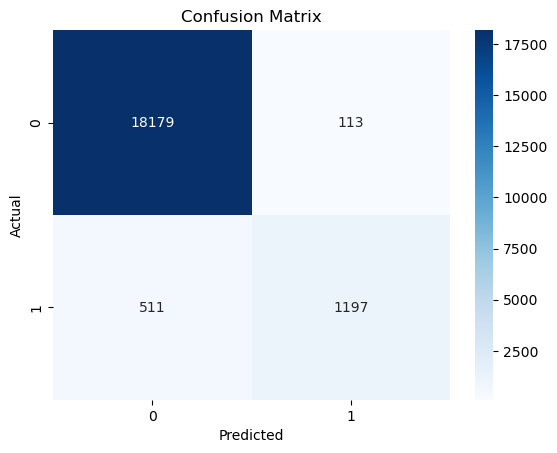

In [91]:
# Create a confusion Matrix
rcm = confusion_matrix(y_test, rfy_pred)

# Visualise the confusion matrix
sns.heatmap(rcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

###### From the above confusion matrix, 1197 were true positive predictions and 18179 were true negative predictions. 511 and 113 were false negative and false positive predictions respectively.  

###### Compared to the two models above, the Random Forest Classifier proves more effective and has higher accuracy and precision. However, the false negative prediction is a concern and further analysis of these patients is crucial.  

In [93]:
# 8 Machine Learning Algorithms will be applied to the dataset

classifiers = [[XGBClassifier(), "XGB Classifier"],
               [RandomForestClassifier(), "Random Forest"],
               [KNeighborsClassifier(), "K-Nearest Neighbors"],
               [SGDClassifier(), "SGD Classifier"],
               [SVC(), "SVC"],
               [GaussianNB(), "Naive Bayes"],
               [DecisionTreeClassifier(random_state = 42), "Decision Tree"],
               [LogisticRegression(), "Logistic Regression"]
              ]

In [95]:
classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...),
  'XGB Classifier'],
 [RandomForestClassifier(), 'Random Forest'],
 [KNeighborsClassifier(), 'K-Nearest Neighbors'],
 [SGDClassifier(), 'SGD Classifier'],
 [SVC(), 'SVC'],
 [GaussianNB(), 'Naive Bayes'],
 [DecisionTreeC

In [97]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(x_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(x_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100,2)) + "%"])
    precision_list[model_name] = ([str(round(p_score*100,2)) + "%"])
    recall_list[model_name] = ([str(round(r_score*100,2)) + "%"])
    roc_list[model_name] = ([str(round(roc_score*100,2)) + "%"])
    
    if model_name != classifiers[-1][1]:
        print(" ")

acc_list

{'XGB Classifier': ['97.16%'],
 'Random Forest': ['96.95%'],
 'K-Nearest Neighbors': ['95.78%'],
 'SGD Classifier': ['95.55%'],
 'SVC': ['91.48%'],
 'Naive Bayes': ['90.55%'],
 'Decision Tree': ['95.55%'],
 'Logistic Regression': ['95.84%']}

In [98]:
print("Accuracy Score")
sl = pd.DataFrame(acc_list)
sl.head()

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,97.16%,96.95%,95.78%,95.55%,91.48%,90.55%,95.55%,95.84%


In [99]:
print("Precision")
s2 = pd.DataFrame(precision_list)
s2.head()

Precision


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,96.19%,91.97%,88.7%,78.88%,100.0%,46.13%,73.56%,87.83%


In [103]:
print("Recall")
s3 = pd.DataFrame(recall_list)
s3.head()

Recall


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,69.5%,70.37%,57.9%,65.4%,0.23%,63.23%,74.77%,59.6%


In [105]:
print("ROC Score")
s4 = pd.DataFrame(roc_list)
s4.head()

ROC Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,84.62%,84.9%,78.61%,81.88%,50.12%,78.17%,86.13%,79.42%


###### From the 8 Machine Learning Algorithms, the XGB Classifier has a higher Accuracy, SVC has a higher Precision and the Decision Tree has a higher Recall. These are the most important Matrics. 